# Part 4

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import PandaSurvey
import weightedcalcs as wc

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Dataset with Total NYC Population

In [2]:
df = pd.read_csv('004usa_00005.csv')

## Weighting Dataframe for Plotting Medicaid vs Non-Medicaid New Yorkers

In [3]:
weighted_df = df.groupby(['YEAR', 'HINSCAID'], as_index=False).sum()[['YEAR', 'HINSCAID', 'PERWT']]

In [4]:
weighted_df

,YEAR,HINSCAID,PERWT
0,2009,1,6061500.0
1,2009,2,2329566.0
2,2010,1,5721683.0
3,2010,2,2463631.0
4,2011,1,5694961.0
5,2011,2,2549465.0
6,2012,1,5760228.0
7,2012,2,2577003.0
8,2013,1,5792151.0
9,2013,2,2615212.0


Pivot dataframe for calculating Medicaid population share and plotting

In [6]:
weighted_pivotyr = weighted_df.pivot(index = ['YEAR'], columns = 'HINSCAID', values = "PERWT") \
    .reset_index()

weighted_pivotyr.columns = ['YEAR', 'no_medicaid', 'has_medicaid']

weighted_pivotyr['pct_medicaid'] = weighted_pivotyr["has_medicaid"] / (weighted_pivotyr["no_medicaid"] + weighted_pivotyr["has_medicaid"])

weighted_pivotyr

,YEAR,no_medicaid,has_medicaid,pct_medicaid
0,2009,6061500.0,2329566.0,0.277625
1,2010,5721683.0,2463631.0,0.300982
2,2011,5694961.0,2549465.0,0.309235
3,2012,5760228.0,2577003.0,0.309096
4,2013,5792151.0,2615212.0,0.311062
5,2014,5780314.0,2711919.0,0.319341
6,2015,5667162.0,2884776.0,0.337324
7,2016,5591882.0,2946181.0,0.345064
8,2017,5668462.0,2954344.0,0.342620
9,2018,5571659.0,2825748.0,0.336502


## Plotting Medicaid Recipients as a share of Total NYC Population

Setting Plot theme

In [7]:
sns.set_theme(context='notebook', style='white', font='Helvetica Neue', font_scale=1)

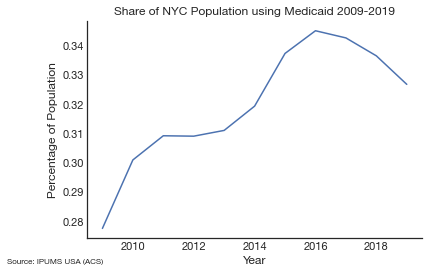

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = sns.lineplot(x='YEAR', y='pct_medicaid', data=weighted_pivotyr, palette=sns.color_palette('colorblind', n_colors=2))
sns.despine()
y.set(xlabel='Year', ylabel='Percentage of Population', title='Share of NYC Population using Medicaid 2009-2019')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('Share of NYC Population on Medicaid.png', bbox_inches='tight')

## Weighting Dataframe for Plotting Medicaid vs Non-Medicaid New Yorkers by Borough

In [9]:
weighted = df.groupby(['YEAR', 'HINSCAID', 'COUNTYICP'], as_index=False).sum()[['YEAR', 'HINSCAID', 'COUNTYICP', 'PERWT']]

Pivoting dataframe again for calculation and plotting

In [10]:
weighted_pivot = weighted.pivot(index = ['YEAR', 'COUNTYICP'], columns = 'HINSCAID', values = "PERWT") \
    .reset_index()

weighted_pivot.columns = ['YEAR', 'COUNTYICP', 'no_medicaid', 'has_medicaid']

weighted_pivot['pct_medicaid'] = weighted_pivot["has_medicaid"] / (weighted_pivot["no_medicaid"] + weighted_pivot["has_medicaid"])

weighted_pivot

,YEAR,COUNTYICP,no_medicaid,has_medicaid,pct_medicaid
0,2009,50,842071.0,555593.0,0.397515
1,2009,470,1746032.0,820213.0,0.319616
2,2009,610,1320966.0,307987.0,0.189071
3,2009,810,1755029.0,551551.0,0.239121
4,2009,850,397402.0,94222.0,0.191655
5,2010,50,786078.0,600089.0,0.432912
6,2010,470,1663938.0,845648.0,0.336967
7,2010,610,1244604.0,341891.0,0.215501
8,2010,810,1635683.0,598109.0,0.267755
9,2010,850,391380.0,77894.0,0.165988


Recoding COUNTYICP Column

In [11]:
weighted_pivot['COUNTYICP'].replace({50: 'Bronx', 470: 'Brooklyn', 610: 'Manhattan', 810: 
                         'Queens', 850:'Staten Island'}, inplace=True)

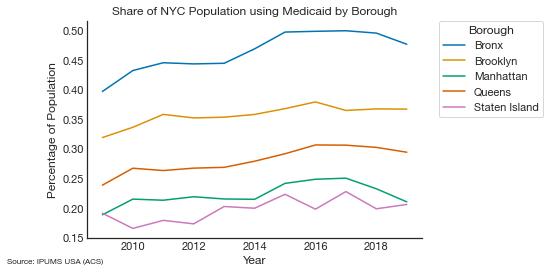

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = sns.lineplot(x='YEAR', y='pct_medicaid', hue='COUNTYICP', data=weighted_pivot, palette=sns.color_palette('colorblind', n_colors=5))
sns.despine()
y.set(xlabel='Year', ylabel='Percentage of Population', title='Share of NYC Population using Medicaid by Borough')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Borough')
plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('Share of NYC Population on Medicaid by Borough.png', bbox_inches='tight')